¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola, Marco! Recuerda que es importante agregar una introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir y un análisis inicial sobre los datos con los que contamos. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

<div class="alert alert-block alert-info">
<b>Se agrega introducción, objetivo y etapas del análisis del proyecto de acuerdo con las recomendaciones del revisor, esto ayudará a trabajar de una manera más eficiente y organizada.</b> <a class="tocSkip"></a>
</div>

# Proyecto Intregrado 1

## Introducción

En el emocionante mundo de los videojuegos, la tienda online Ice se enfrenta al desafío de identificar patrones que determinen el éxito de un juego. Con acceso a datos históricos sobre ventas, reseñas de usuarios y expertos, géneros y plataformas, nuestro objetivo es descubrir qué factores influyen en el rendimiento de los juegos. Imaginemos que estamos en diciembre de 2016, y estamos planeando una campaña para 2017. Este proyecto nos brinda la oportunidad de adquirir experiencia en el análisis de datos y tomar decisiones informadas.

## Objetivo

El objetivo principal es predecir el éxito de los juegos en función de sus características. Queremos identificar proyectos prometedores y planificar campañas publicitarias efectivas. Para lograrlo, nos centraremos en las siguientes etapas:

Limpieza y preparación de datos:

* Trataremos los valores faltantes, duplicados y atípicos en el conjunto de datos.
* Realizaremos transformaciones necesarias, como codificación de variables categóricas y normalización.

Exploración de datos:

* Comenzaremos por explorar el conjunto de datos disponible. Investigaremos las variables relevantes, como género, plataforma, reseñas y clasificación ESRB.
* Identificaremos posibles relaciones entre estas variables y las ventas de los juegos.

Análisis descriptivo:

* Calcularemos estadísticas descriptivas para comprender la distribución de las ventas, reseñas y otras métricas.
* Visualizaremos los datos utilizando gráficos para obtener una visión general.

Prueba de hipótesis:

* Evaluaremos las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.

* Evaluaremos calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

Conclusiones Generales

## Información General del Proyecto

### Carga de librerias

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene
from scipy.stats import ttest_ind



### Carga de base de datos

In [3]:
df = pd.read_csv("/datasets/games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo que como buena práctica separes la carga de las librerías y la carga de las bases de datos. 
</div>

<div class="alert alert-block alert-info">
<b>Para generar buen hábito en el trabajo, se ha separado en dos secciones la carga de las librerías necesarias para el proyecto y la carga de la base de datos que se usará durante todo el análisis posterior.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Preparación de los Datos

### Reemplazo de columnas

In [4]:
df.info()

#Correción de nombres de columnas

new_names = {"Name":"name", "Platform":"platform", "Year_of_Release":"year_of_release", "Genre":"genre", "NA_sales": "na_sales", "EU_sales":"eu_sales", "JP_sales":"jp_sales", "Other_sales": "other_sales", "Critic_Score":"critic_score", "User_Score":"user_score", "Rating":"rating"}

df = df.rename(columns = new_names) #reemplaza los nombres de las columnas

print("Muestra los nombres corregidos de columnas")

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Muestra los nombres corregidos de columnas


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo presentando la información de la base de datos.

</div>

### Conversión de tipo de datos

In [5]:
#Convsersión de tipos de datos

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


En la columna "year_of release" no se efectuarán cálculos pero si se usará para generar gráficas en lo posterior,
por tanto, no se ha convertido al tipo de datos "object" ya que esto haría incompatible con los datos tipo float que son necesarios para mostar las ventas totales por año más adelante

### Tratamiento de valores ausentes

In [6]:
#Tratamiento de valores ausentes

df["name"].fillna("unknown", inplace = True) #reemplaza los ausentes con la palabra "unknown"
df["genre"].fillna("unknown", inplace = True) #reemplaza los ausentes con la palabra "unknown"
df["rating"].fillna("unrated", inplace = True) #reemplaza los ausentes con la palabra "unrated"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Calificación de los usuarios por año')

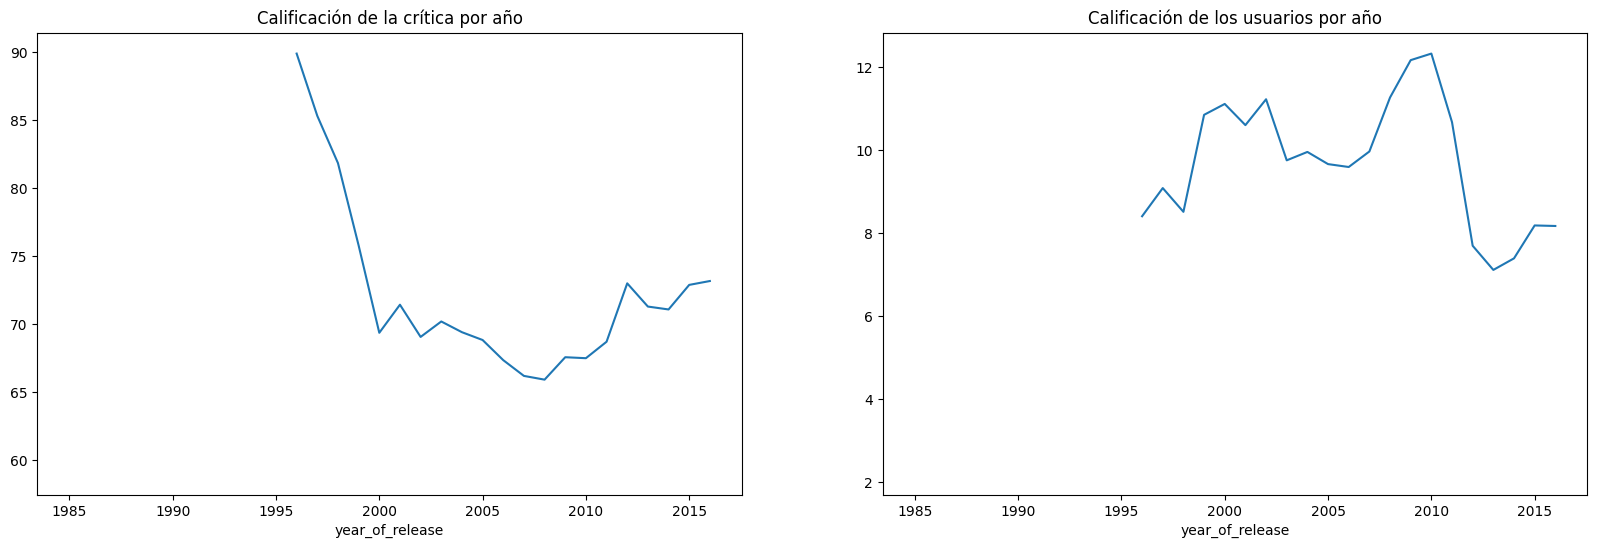

In [45]:
#analiza valores nulos de critic_score

# Crear una figura y dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Graficar los datos critic_score en el primer subplot

df.groupby("year_of_release")["critic_score"].mean().plot(kind = "line",ax=ax1)
ax1.set_title("Calificación de la crítica por año")

#analiza valores nulos y tbd de user_score

df["user_score_tbd"] = df["user_score"].replace('tbd','20').astype(float)

df.groupby("year_of_release")["user_score_tbd"].mean().plot(kind = "line",ax=ax2)
ax2.set_title("Calificación de los usuarios por año")

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Realizaste un excelente trabajo al analizar los valores nulos que podrían sesgar nuestros resultados. Además, es una buena práctica no eliminarlos, sino reemplazarlos con un identificador que indique que carecen de valor en alguna de las variables.
</div>

* Para el campo "name" y "genre", se rellenaron con la palabra "unknown" para indicar que no se conocen los nombres de dichos campos.

* Debido a que la columna "year_of_release" se usará más adelante para realizar gráficos, no se realizarán modificaciones

* Por otro lado, para el campo "rating", los valores ausentes fueron reemplazados por la palabra "unrated" que indica que no tienen clasificación alguna

* Para el caso de "critic_score" y "user_score", se ha decidido dejarlos en blanco ya que no se puede sustituir con una palabra ya que se trata de datos tipo float64 y no se los puede rellenar con ceros, ya que esto significaría que esos juegos tendrían cero calificación por parte de la crítica y/o users, lo cual tampoco es cierto y nuestro análisis sería incorrecto

* Para la columna "user_score", existe una particularidad, ciertos datos fueron ingresados como "tbd" o "to be determined", lo que signica que estos valores estan pendientes de definición, por tanto no se los manipulará ya que se espera una actualización de estos valores por parte de la fuente que entregó el dataset original

* Analizando las columnas de critic_score y user_score, se puede observar que antes de 1996 aparentemente el sistema de calificación de usuario y de la crítica aún no existía y esa es la razón de los valores ausentes durante ese periodo

* Por otro lado, las gráficas no muestran un patron o una tendencia clara como para reemplazar estos valores ausentes, ya sea por la moda, mediana o media

* Para el presente análsis no se reemplazarán los valores ausentes con otros valores ya que podrían afectar siginificativamente los resultados ya que representan aproximadamente el 13% del total de los valores analizados

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Solamente para terminar de complementar el análisis te recomiendo verificar si las variables de score de crititicos y ususarios  se deben de hacer algún ajuste. Por ejemplo completar los valores nulos
</div>

<div class="alert alert-block alert-info">
<b>Según recomendación del revisor se han analizado las columnas critic_score y user_score y se observó que las calificaciones no existían desde que las consolas nacieron y que las tendencias durante los años no tienen una tendencia clara por lo que se determinó no eliminar ni reemplazar estos valores.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

### Cálculo de las ventas totales

In [8]:
#Cálculo de las ventas totales

df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"] # genera nueva columna con las ventas totales 

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

## Análisis de los Datos

### Cantidad de juegos lanzados por año

In [9]:
df.groupby("year_of_release")["platform"].count().reset_index() #agrupa y cuenta por año de lanzamiento

,year_of_release,platform
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


* Analizando los lanzamientos por cada año, podemos ver que no todos los años son representativos, en 8 años de la década de los 80's, hubieron menos de 20 juegos por año que fueron lanzados

### Plataformas con mayores ventas totales

In [10]:
# agrupa por año de lanzamiento y plataforma para obtener la suma de las ventas totales
sales_by_platform = df.groupby(["year_of_release","platform"])["total_sales"].sum().reset_index()

# agrupa por plataforma para obtener el total de las ventas
top_list = sales_by_platform.groupby("platform")["total_sales"].sum().reset_index()

#filtra para obtener las 10 plataformas con mayores ventas
top10 = top_list.query("total_sales >= 256")

#ordena por total de ventas
top10 = top10.sort_values(by=['total_sales'], ascending=[False]).reset_index()

#muestra el top 10 en ventas por plataforma
pop_platform = top10["platform"]
print(f"Las plataformas más populares en ventas son: \n{pop_platform}")

sales_per_year = sales_by_platform.query("platform == ['PS2','X360','PS3','Wii', 'DS', 'PS','PS4','GBA','PSP','3DS']").reset_index()
sales_per_year
print()
print("Top 10 plataformas más vendidas")
top10


Las plataformas más populares en ventas son: 
0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
7     GBA
8     PSP
9     3DS
Name: platform, dtype: object

Top 10 plataformas más vendidas


,index,platform,total_sales
0,16,PS2,1233.56
1,28,X360,961.24
2,17,PS3,931.34
3,26,Wii,891.18
4,4,DS,802.78
5,15,PS,727.58
6,18,PS4,314.14
7,6,GBA,312.88
8,19,PSP,289.53
9,2,3DS,257.81


### Distribución de plataformas por año

<AxesSubplot:xlabel='year_of_release'>

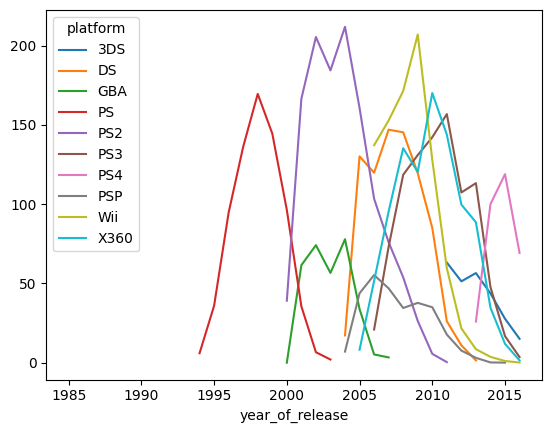

In [11]:
#genera lista con el top 10 por plataforma
#genera gráfico de distribución del top 10 por plataforma
top10_list = list(top10["platform"])

(
    df[df["platform"].isin(top10_list)]
    .pivot_table(index = "year_of_release",
                columns = "platform",
                values = "total_sales",
                aggfunc = "sum")
    .plot(kind = "line")
)

### Análisis del tiempo de vida por plataforma (Play Station)

<AxesSubplot:xlabel='year_of_release'>

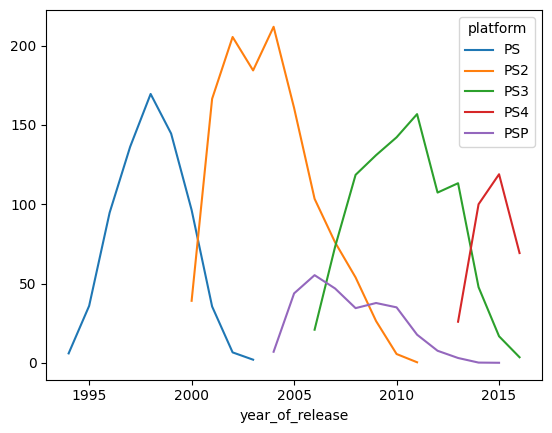

In [12]:
#Analísis para determinar el tiempo de vida de una plataforma y cuando aparece una nueva, ejemplo Play Station

psp_platforms = ["PS", "PS2", "PS3","PS4", "PSP"] #genera lista de plataformas Play Station

(
    df[df["platform"].isin(psp_platforms)]
    .pivot_table(index = "year_of_release",
                columns = "platform",
                values = "total_sales",
                aggfunc = "sum")
    .plot(kind = "line")
)

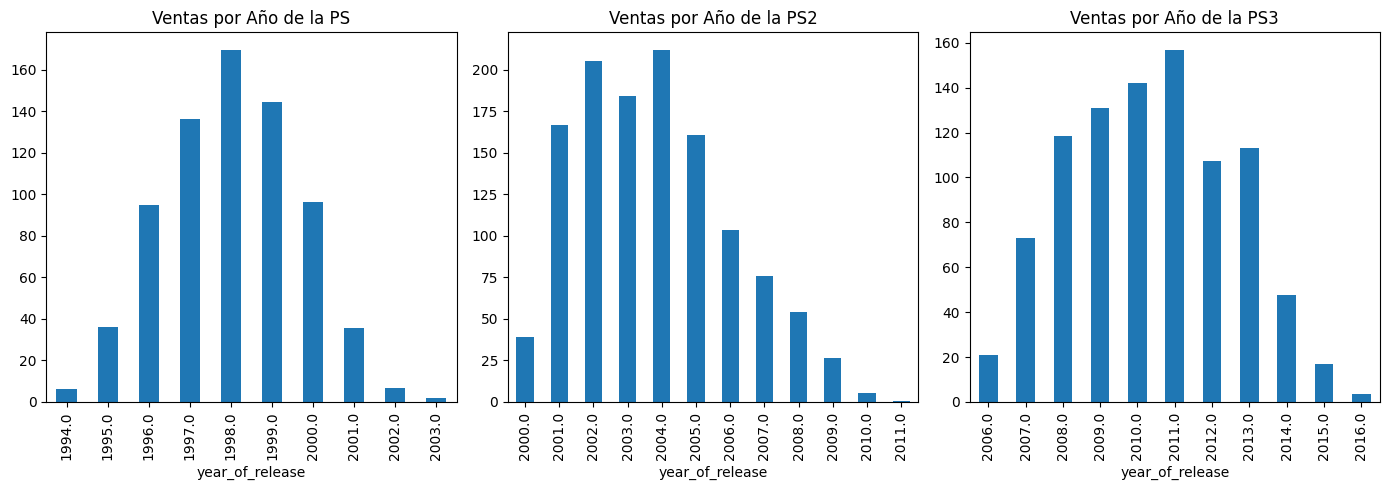

In [13]:
# análisis de ventas por año de la Play Station (PS,PS2 y PS3)

# Crear una figura y dos subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

# Graficar los datos de la PS en el primer subplot
df[df["platform"] == 'PS'].groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", ax=ax1)
ax1.set_title("Ventas por Año de la PS")

# Graficar los datos de la PS2 en el primer subplot
df[df["platform"] == 'PS2'].groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", ax=ax2)
ax2.set_title("Ventas por Año de la PS2")

# Graficar los datos de la PS3 en el primer subplot
df[df["platform"] == 'PS3'].groupby("year_of_release")["total_sales"].sum().plot(kind = "bar", ax=ax3)
ax3.set_title("Ventas por Año de la PS3")

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

* Para este análsis se han tomado los años donde se encuentra el top 10 de ventas por plataforma, este periodo es desde el año 1994 al 2016

* La PS tuvo su hegemonía durante 6 años, desdel 1994 a 1999, aunque en los 4 años siguientes continuó teniendo una participación significativa del mercado

* Dentro de este mismo marco, muchas plataformas como la PS, PS2, PSP, DS y la GBA, fueron populares en su periodo y al momento ya no tienen ventas

* También se puede observar que las nuevas plataformas aparecen cada 5 o 6 años y tardan en desaparecer 10 años aproximadamente

* En el top 3 de las plataformas más vendidas se encuentra el PS2 liderando la lista, seguido de la X360 y cerrando este grupo la PS3

* Se puede observar que las plataforma que van en crecimiento son: 3DS, PS3, PS4, Wii y X360, por lo contrario, existen plataformas que han ido de reduciendo sus ventas como son: DS y PSP

* Adicionalmente existen plataformas que se encuentran que están en pleno crecimiento y que podrían ser rentables en el futuro medio, tales como la nueva PS4, Wii y X360 donde se podrían incorporar nuevos títulos de juegos

* En cuanto al análsis de las ventas por plataformas, se ha elegido la Play Station y sus consolas más vendidas (PS, PS2 y PS3) para tratar de descubrir como se han comportado las ventas a lo largo de los años

* Se puede observar que en cuanto una nueva consola aparece, las ventas de la antigua plataforma comienzan a decaer y que el pico máximo de ventas de la nueva plataforma conicide con la desaparición total de la antigua

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Te recomiendo completar este análisis con una gráfica de ventas por año  

</div>

<div class="alert alert-block alert-info">
<b>Siguiendo la recomendación del revisor, se ha comparado el comportamiento de las ventas de la plataform elegida con el pasar de los años, lo que ha ayudado a evidenciar nuevos hallazgos sobre como la aparición de las nuevas consolas afectan los ingresos de las plataformas salientes y las nuevas.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

### Diagrama de caja para ventas globales por plataforma

<Figure size 1200x600 with 0 Axes>

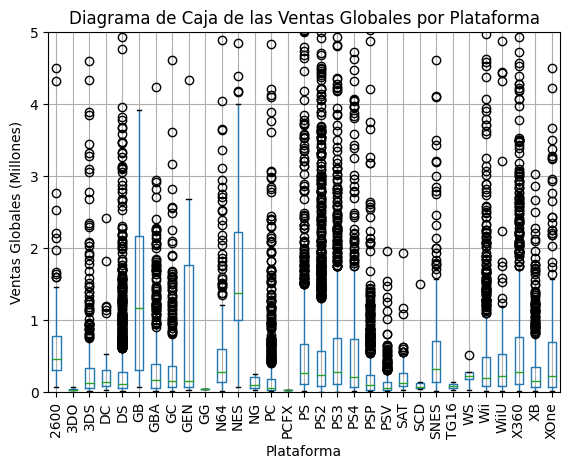

In [14]:
# Crear un diagrama de caja para las ventas globales desglosadas por plataforma.
plt.figure(figsize=(12,6))
df.boxplot(column='total_sales', by='platform', rot=90)
plt.title('Diagrama de Caja de las Ventas Globales por Plataforma')
plt.suptitle('')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (Millones)')
plt.ylim(0, 5)  # Por ejemplo, establecer un límite superior de 200 millones
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

* Respecto a la gráfica de bigotes realizada, se puede observar que existen diferencias notables entre las ventas globales de cada una de las plataformas analizadas, por ejemplo 3DO, GG, NG, PCFX, SCD y TG16 al parecer no tuvieron mucha acogida entre los fans de las consolas ya que no muestran mayores ventas durante el tiempo que estuvieron en el mercado

* Analizando las ventas promedio, existen plataformas cuyas ventas globales tienden a cero, es decir que no fueron populares durante su tiempo de vida, por otro lado, nombres como GB y NES en promedio son las que mayores venta globales acumularon

### Gráfico de dispersión - Reseñas vs. Ventas

In [15]:
#filtra por plataforma PS2 para ejemplificar

ps2_sales = (df.query("platform == 'PS2'")[["platform","user_score","critic_score","total_sales"]].reset_index()).drop("index",axis = 1)

ps2_sales

#Reemplaza la palabra "tbd" por nan para facilitar el gráfico
ps2_sales["user_score"] = ps2_sales["user_score"].replace('tbd', np.nan)

#trasnforma la columna "user_score" a float
ps2_sales["user_score"] = ps2_sales["user_score"].astype(float)

print(ps2_sales.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   platform      2161 non-null   object 
 1   user_score    1241 non-null   float64
 2   critic_score  1298 non-null   float64
 3   total_sales   2161 non-null   float64
dtypes: float64(3), object(1)
memory usage: 67.7+ KB
None


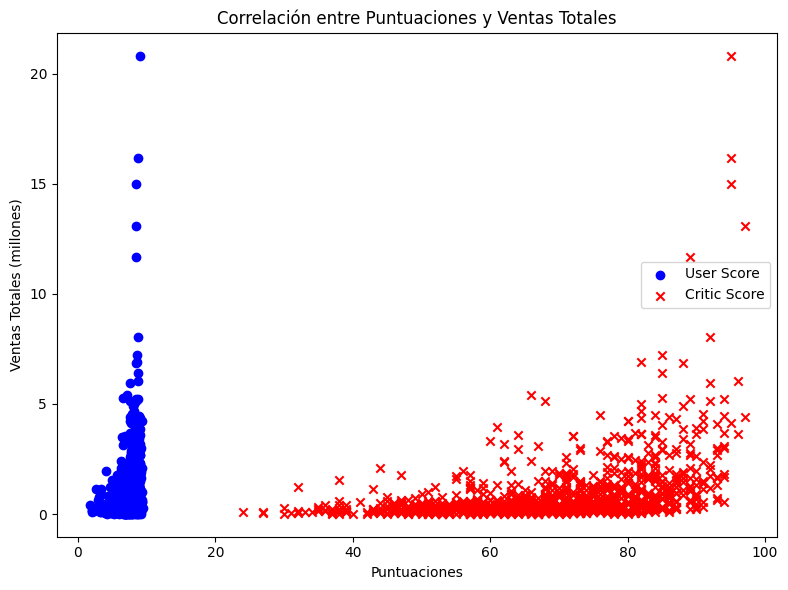

In [16]:
#Genera gráfico de dispersión para la PS2

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(ps2_sales["user_score"], ps2_sales["total_sales"], label='User Score', color='blue', marker='o')
plt.scatter(ps2_sales["critic_score"], ps2_sales["total_sales"], label='Critic Score', color='red', marker='x')

# Personalizar el gráfico
plt.title('Correlación entre Puntuaciones y Ventas Totales')
plt.xlabel('Puntuaciones')
plt.ylabel('Ventas Totales (millones)')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

In [17]:
#muestra las correlaciones entre las ventas totales y las puntiaciones de los usuarios y de la crítica

print(ps2_sales[["total_sales","user_score"]].corr())


ps2_sales[["total_sales","critic_score"]].corr()

             total_sales  user_score
total_sales     1.000000    0.172866
user_score      0.172866    1.000000


,total_sales,critic_score
total_sales,1.000000,0.395435
critic_score,0.395435,1.000000


* De acuerdo con el digrama de dispersión creado, es claramente notable como se relaciona directamente la calificación de los usuarios y de la crítica con las ventas de las plataformas, que para el ejemplo se ha tomado la PS2

* La calificación dada por el usuario ("user_score"), tiene una rango del 0 al 10, mientras que la crítica es dada en un rango del 0 al 100, sin embargo se puede observar que las tendencias son las mismas en cuanto a la relación puntaje - ventas

* Además, podemos ver que tanto el "user_score" como el "critic_score" tienen similar comportamiento, es decir que cuando las calificaciones de los usuarios es baja, también las de la crítica es baja, y lo mismo pasa con todas las puntuaciones y su relación con las ventas

### Comparación de juegos en otras plataformas (Need for Speed: Most Wanted)

Top 3 de plata
name
Need for Speed: Most Wanted    10
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
Name: platform, dtype: int64


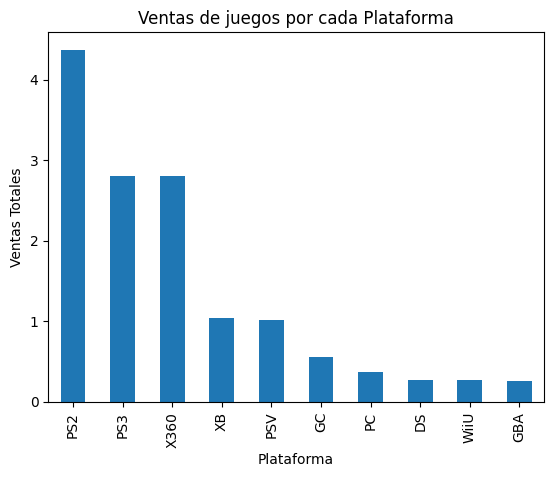

In [18]:
# Agrupar por el nombre del juego y genera el top 3 de cantidad de plataformas donde aparecen los juegos
games_by_platform = df.groupby("name")["platform"].nunique().sort_values(ascending = False).head(3)

print("Top 3 de plata" )
print(games_by_platform) #muestra el top 3 de juegos que salieron para más plataformas

#filtra por juego 'Need for Speed: Most Wanted' que se toma como referencia para el análisis
NFS_filtered = df.query("name == 'Need for Speed: Most Wanted'")

#agrupa por total de ventas y suma sus valores
NFS_platforms = NFS_filtered.groupby("platform")["total_sales"].sum().sort_values(ascending = False)

# Crear el gráfico de barras
NFS_platforms.plot(x='platform', y='total_sales', kind='bar', legend=False)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.title('Ventas de juegos por cada Plataforma')
plt.show()


* Del análiis se desprende que NFS Most Wanted tuvo mayor cantidad de ventas en la PS2 que es una de la plataformas más populares y en segundo lugar la PS3 con un 25% menos en ventas

### Distribución general de juegos por género

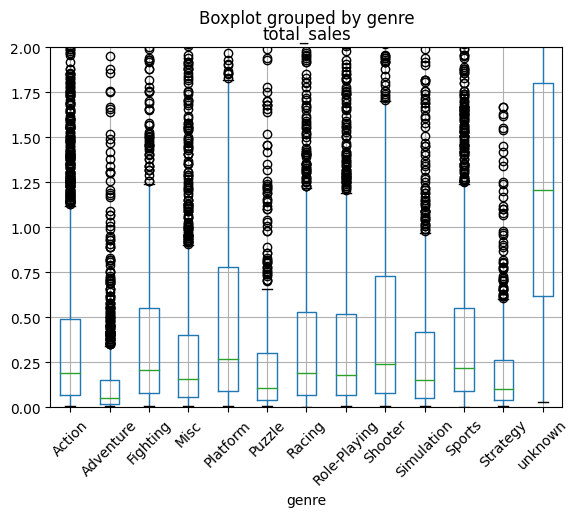

In [19]:
#grafica un diagrama de caja de ventas totales por género
df.boxplot(
column = "total_sales",
by = "genre")
plt.ylim(0,2)
plt.xticks(rotation = 45)
plt.show()

* Del análiis de la gráfica de caja, podemos observar que los géneros más rentables son Platform, Shooter y Sports, esto basado en el promedio de ventas totales.

* Por otro lado, los géneros menos vendidos son Adventure, Puzzle y Strategy.

* Los géneros con ventas altas tienen medias bastantes parecidas, en cuanto a los géneros con ventas bajas, no se puede generalizar nada en particular

## Crea un perfil de usuario para cada región (NA, EU, JP)

### Cinco plataformas principales por región

#### Variación de cuotas de mercado en NA

El promedio de ventas de NA es: 4402.35

El top 5 de ventas en NA es:

  platform  na_sales  market_share
0     X360    602.47      0.136852
1      PS2    583.84      0.132620
2      Wii    496.90      0.112872
3      PS3    393.49      0.089382
4       DS    382.40      0.086863


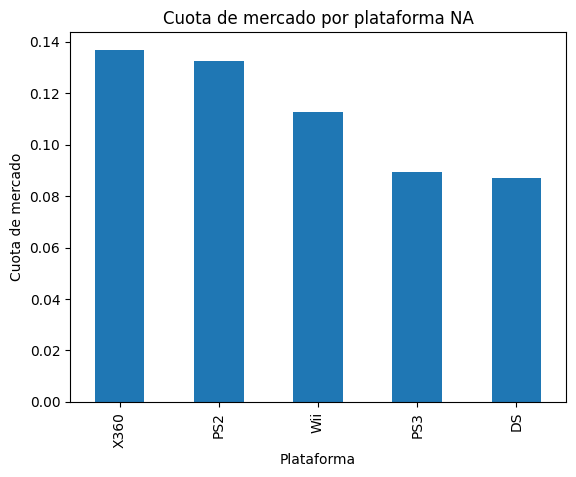

In [20]:
#filtra por nombre, plataforma, género, ventas en la región y rating
na_buyer = df[["name","platform","genre","na_sales","rating"]]
na_total_sales = df["na_sales"].sum() # suma las ventas

print(f"El promedio de ventas de NA es: {na_total_sales}")
print()

#agrupa por plataforma para obtener la suma de las ventas y obtiene el top 5
na_top5 = na_buyer.groupby("platform")["na_sales"].sum().sort_values(ascending = False).head(5).reset_index()

na_top5c = na_top5.copy() #genera una copia del top 5

na_top5c["market_share"] = na_top5c["na_sales"] / na_total_sales #genera una nueva columna con la compartición del mercado

print("El top 5 de ventas en NA es:")
print()
print(na_top5c)

# Crear el gráfico de barras
na_top5c.plot(x='platform', y='market_share', kind='bar', legend=False)
plt.xlabel('Plataforma')
plt.ylabel('Cuota de mercado')
plt.title('Cuota de mercado por plataforma NA')
plt.show()


#### Variación de cuotas de mercado en EU

El promedio de ventas de EU es: 2424.67

El top 5 de ventas en EU es:

  platform  eu_sales  market_share
0      PS2    339.29      0.139932
1      PS3    330.29      0.136221
2     X360    270.76      0.111669
3      Wii    262.21      0.108143
4       PS    213.61      0.088099


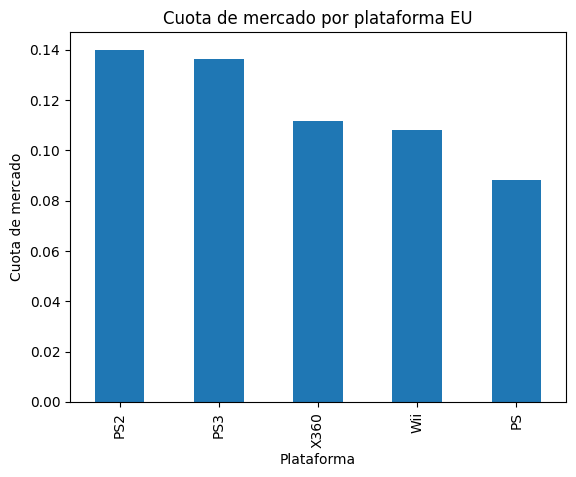

In [21]:
#filtra por nombre, plataforma, género, ventas en la región y rating
eu_buyer = df[["name","platform","genre","eu_sales","rating"]]

eu_total_sales = df["eu_sales"].sum() #suma las ventas

print(f"El promedio de ventas de EU es: {eu_total_sales}")
print()

#agrupa por plataforma para obtener la suma de las ventas y obtiene el top 5
eu_top5 = eu_buyer.groupby("platform")["eu_sales"].sum().sort_values(ascending = False).head(5).reset_index()

eu_top5c = eu_top5.copy() #genera una copia del top 5

#genera una nueva columna con la compartición del mercado
eu_top5c["market_share"] = eu_top5c["eu_sales"] / eu_total_sales

print("El top 5 de ventas en EU es:")
print()
print(eu_top5c)

# Crear el gráfico de barras
eu_top5c.plot(x='platform', y='market_share', kind='bar', legend=False)
plt.xlabel('Plataforma')
plt.ylabel('Cuota de mercado')
plt.title('Cuota de mercado por plataforma EU')
plt.show()

#### Variación de cuotas de mercado en JP

El promedio de ventas de JP es: 1297.37

El top 5 de ventas en JP es:

  platform  jp_sales  market_share
0       DS    175.57      0.135328
1       PS    139.82      0.107772
2      PS2    139.20      0.107294
3     SNES    116.55      0.089836
4      3DS    100.67      0.077595


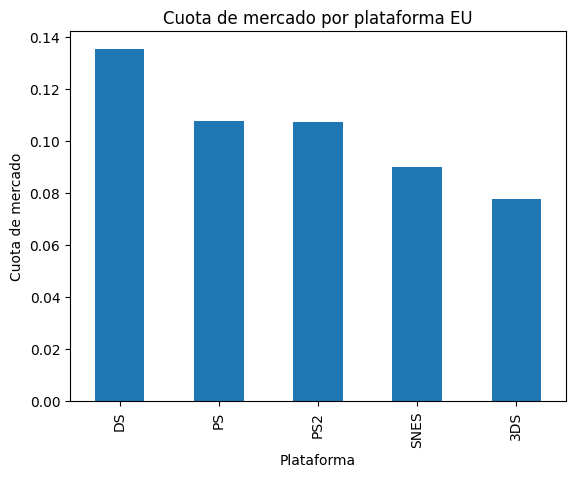

In [22]:
#filtra por nombre, plataforma, género, ventas en la región y rating
jp_buyer = df[["name","platform","genre","jp_sales","rating"]]

jp_total_sales = df["jp_sales"].sum() #suma las ventas de la región

print(f"El promedio de ventas de JP es: {jp_total_sales}")
print()

#agrupa por plataforma para obtener la suma de las ventas y obtiene el top 5
jp_top5 = jp_buyer.groupby("platform")["jp_sales"].sum().sort_values(ascending = False).head(5).reset_index()

jp_top5c = jp_top5.copy() #genera una copia del top 5

#genera una nueva columna con la compartición del mercado
jp_top5c["market_share"] = jp_top5c["jp_sales"] / jp_total_sales

print("El top 5 de ventas en JP es:")
print()
print(jp_top5c)

# Crear el gráfico de barras
jp_top5c.plot(x='platform', y='market_share', kind='bar', legend=False)
plt.xlabel('Plataforma')
plt.ylabel('Cuota de mercado')
plt.title('Cuota de mercado por plataforma EU')
plt.show()

* De los gráficas y compartativos de los top 5 en ventas por región de puede ver, que tanto NA como EU tienen gustos bastantes semejantes en cuanto a plataformas, tanto es así que comparten 4/5 plataformas del top, que son: X360, PS2, PS3 y Wii

* Por otro lado, la región de JP al parecer prefiere la portabilidad y lo clásico, ya que en su top de ventas se encuentran plataformas como la DS y 3DS, y en cuarto lugar la SNES

* Analizando las variaciones según la compartición de mercado, de uno a otro, la única plataforma que se encuentra en el top de todas las regiones es la PS2, donde podemos ver que en NA la PS2 tiene el 13.2% de las ventas y tiene el segundo puesto del su top, en EU es número 1 de su región con el 13.99% y en JP la PS2 posee el 10.73% del mercado

* Esto sitúa a la PS2 como líder absoluta en ventas totales en todas las regiones con un valor de aproximado de 1.000 millones de dólares

### Cinco géneros principales por región

#### Principales géneros en NA

In [23]:
# Top 5 de géneros en NA
#agrupa por género y suma las ventas de la región
na_genre_top5 = na_buyer.groupby("genre")["na_sales"].sum().sort_values(ascending = False).head(5).reset_index()
na_genre_top5


,genre,na_sales
0,Action,879.01
1,Sports,684.43
2,Shooter,592.24
3,Platform,445.50
4,Misc,407.27


#### Principales géneros en EU

In [24]:
# Top 5 de géneros en EU
#agrupa por género y suma las ventas de la región
eu_genre_top5 = eu_buyer.groupby("genre")["eu_sales"].sum().sort_values(ascending = False).head(5).reset_index()
eu_genre_top5


,genre,eu_sales
0,Action,519.13
1,Sports,376.79
2,Shooter,317.34
3,Racing,236.51
4,Misc,212.74


#### Principales géneros en JP

In [25]:
# Top 5 de géneros en JP
#agrupa por género y suma las ventas de la región
jp_genre_top5 = jp_buyer.groupby("genre")["jp_sales"].sum().sort_values(ascending = False).head(5).reset_index()
jp_genre_top5


,genre,jp_sales
0,Role-Playing,355.41
1,Action,161.43
2,Sports,135.54
3,Platform,130.83
4,Misc,108.11


* En el top de todas las regiones los géneros más vendidos han sido "Action" y "Sports", aparentemente todos disfrutan de estos títulos en su plataforma preferida

* El género de "Action", aparentemente es el género que más disfrutan en forma general y por supuesto el que más ingresos ha generado con total de 1.559 millones de dólares, aproximadamente 30% por arriba de los juegos de deportes

* Y por último, la particularidad que nos muestra el top en JP es que a diferencia del resto de regiones donde el género "Role-Playing" ni aparece en el top, en JP es el top 1 en ventas de la región, es tan popular que el segundo puesto, "Action", está 55% por debajo en ventas

### Clasificaciones ESRB por región

#### Principales ventas por región según ESRB en NA

In [26]:
# Top 5 de géneros en NA
#agrupa por rating y suma las ventas por región
na_rating_top5 = na_buyer.groupby("rating")["na_sales"].sum().sort_values(ascending = False).head(5).reset_index()
na_rating_top5

,rating,na_sales
0,E,1292.99
1,unrated,1242.46
2,T,759.75
3,M,748.48
4,E10+,353.32


#### Principales ventas por región según ESRB en EU

In [27]:
# Top 5 de géneros en EU
#agrupa por ratinig y suma las ventas de la región
eu_rating_top5 = eu_buyer.groupby("rating")["eu_sales"].sum().sort_values(ascending = False).head(5).reset_index()
eu_rating_top5

,rating,eu_sales
0,E,710.25
1,unrated,613.83
2,M,483.97
3,T,427.03
4,E10+,188.52


#### Principales ventas por región según ESRB en JP

In [28]:
# Top 5 de géneros en JP
#agrupa por rating y suma las ventas por región
jp_rating_top5 = jp_buyer.groupby("rating")["jp_sales"].sum().sort_values(ascending = False).head(5).reset_index()
jp_rating_top5

,rating,jp_sales
0,unrated,841.96
1,E,198.11
2,T,151.40
3,M,64.24
4,E10+,40.20


* Definitivamente los títulos que fueron ideados para todo público son los más vendidos en todas las regiones, aunque en JP existen muchos títulos sin rating que con consumidos, tanto así que lideran las ventas de la región

* Adicional, en todas las regiones también hay presencia de títulos para adolescentes (T) y +17 (M), tanto así que, lideran el top 5 en ventas por rating, por lo que las casas productoras de video juegos deberán seguir enfocándose en estos ratings para nuevos lanzamientos

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Prueba de Hipótesis 

### Prueba de hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


In [81]:
# Prueba de hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#filtra por tipo de plataforma y elimina las filas con valores faltantes y convierte texto a números
h_xone = pd.to_numeric(df.query("platform == 'XOne'")["user_score"],errors = "coerce").dropna()
h_pc = pd.to_numeric(df.query("platform == 'PC'")["user_score"], errors = "coerce").dropna()

alpha = 0.05 #nivel de significancia

#determina si las varianzas son iguales
h_xone1 = h_xone.reset_index()
h_pc1 = h_pc.reset_index()
test = levene(h_xone1['user_score'], h_pc1['user_score'])
if test.pvalue < alpha:
    print("Las varianzas no son iguales")
else:
    
    print("No se puede rechazar la hipótesis sobre las varianzas")
    print()


#ejecuta el ttest y guarda el resultado
results = ttest_ind(h_xone,h_pc, equal_var = True)

#evalúa pvalue contra alpha para rechazar o no la hipótesis
if results.pvalue < alpha:
    print(f"pvalue es: {results.pvalue}")
    print()
    print("Se rechaza la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")
    


No se puede rechazar la hipótesis sobre las varianzas

pvalue es: 1.3896435533548819e-05

Se rechaza la hipótesis nula


### Prueba de hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deporte son diferentes.

In [84]:
# Prueba de hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deporte son diferentes.
#filtra por tipo de plataforma y elimina las filas con valores faltantes y convierte texto a números
h_action = pd.to_numeric(df.query("genre == 'Action'")["user_score"],errors = "coerce").dropna()
h_sports = pd.to_numeric(df.query("genre == 'Sports'")["user_score"], errors = "coerce").dropna()

alpha = 0.05 #nivel de significancia

#determina si las varianzas son iguales
h_action1 = h_action.reset_index()
h_sports1 = h_sports.reset_index()
test2 = levene(h_action1['user_score'], h_sports1['user_score'])
if test2.pvalue < alpha:
    print("Las varianzas no son iguales")
    print()
else:
    
    print("No se puede rechazar la hipótesis sobre las varianzas")
    print()
    
#ejecuta el ttest y guarda el resultado
results = ttest_ind(h_action,h_sports, equal_var = False)

#evalúa pvalue contra alpha para rechazar o no la hipótesis
if results.pvalue < alpha:
    print(f"pvalue es: {results.pvalue}")
    print()
    print("Se rechaza la hipótesis nula")
else:
    print(f"pvalue es: {results.pvalue}")
    print()
    print("No se puede rechazar la hipótesis nula")

Las varianzas no son iguales

pvalue es: 0.11483818791498286

No se puede rechazar la hipótesis nula


* Para comprobar la hipótesis de que las plataformas Xone y PC tienen el mismo promedio de calificación por usuario se obtuvo las series con los valores de las calificaciones para cada caso y se asumió que las varianzas son iguales, así mismo el valor de alpha con el que vamos a comparar los resultados del ttest se colocó en 0.05

* Del resultado se desprende que efectivamente los promedios de las calificaciones por usuario no son iguales entre si

* Para el caso de la hipótesis de que las calificaciones de usuario en promedio son diferentes entre los géneros de Acción y Deportes, se utilizó similar criterio sólo que en este caso la H0 sería demostrar que son diferentes, y de los resultados no podemos aseverar de que sean distintos, posiblemente sus promedios estarán bastante cerca y se lo puede comprobar obteniendo el valor con los datos respectivos

 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con las pruebas de hipótesis. Solamente, para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b>Siguiendo las recomendaciones del revisor, se implementó un análisis previo de Levene para determinar si las varianzas son iguales o no entre las dos poblaciones del caso, ya que esto serviría de input para el análisis de ttest.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Conclusión General



* De entre las múltiples plataformas de video juegos que existen en el mercado, la PS2 ha sido la ganadora por ser la que mayores ingresos ha generado, cerca de 1.200 millones de dólares en ventas no es para nada despreciable

* Se pudo observar que las plataformas nuevas aparecen cada 5 o 6 años y que tardan aproximadamente 10 años en desaparecer por lo que los fans de as consolas de juego podrán disfrutar de sus títulos favoritos por bastante tiempo hasta que nuevas plataformas aparezcan

* La PS4 y X360 podrán ser una gran apuesta ya que se encuentran en el periodo de crecimiento para generar nuevos juegos para los fans de estas consolas de video

* Las calificaciones tanto de usuarios como de la crítica influeyen directamente sobre los ingreso que generan las plataformas, por lo que se deberá prestar especial cuidado a estos datos para medir la temperatura de los nuevos lanzamientos

* NFS Most Wanted ha sido el juego que ha aparecido para más plataformas desde su aparición por lo que los fans posiblemente los estén esperando para las nuevas plataformas o a las que aún no haya llegado

* Por otro lado, los géneros que más han gustado de forma global son los de Acción y Deportes, por lo que se deberían poner los ojos sobre este tipo de géneros para generar aún más ingresos

* Aunque en la región de JP, los Role-Playing han liderado por lo que deberá tener un tratamiento especial

* Los títulos orientados a todo público son los que más ingresos han generado a lo largo de los años por lo que nuevos títulos con esta clasificación podrían ser una buena apuesta para futuros lanzamientos

* Los promedios de ingresos entre los géneros de Acción y Deporte podrían ser iguales por lo que en un análisis más profundo podríamos determinar si esto es verdad para crear una estrategia para potenciar juegos de este género

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando 

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>